# California 2018-2022 Homicide Data
## Data Preparation File
### This file cleans & prepares statewide homicide data then creates a csv file of the data that can be used for additional exploratory analysis

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df2 = pd.read_csv('HomicideActuals1987-2022.csv', low_memory=False)


df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88930 entries, 0 to 88929
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CO           88930 non-null  int64  
 1   NCIC         88930 non-null  object 
 2   BCS          87954 non-null  float64
 3   vict num     87954 non-null  float64
 4   Rpt MO       87954 non-null  float64
 5   Rpt YR       88930 non-null  int64  
 6   Tot vic      87954 non-null  float64
 7   Tot susp     86991 non-null  float64
 8   V sex        88925 non-null  float64
 9   V race       88930 non-null  object 
 10  V age        88930 non-null  object 
 11  Crm Stat     88930 non-null  int64  
 12  VO_1         88880 non-null  float64
 13  VO_2         12952 non-null  float64
 14  VO_3         4039 non-null   float64
 15  VO_4         1568 non-null   float64
 16  Inc MO       88930 non-null  int64  
 17  Inc day      88930 non-null  int64  
 18  Inc YR       88930 non-null  int64  
 19  Week

In [3]:
df2.head()

,CO,NCIC,BCS,vict num,Rpt MO,Rpt YR,Tot vic,Tot susp,V sex,V race,...,VO_4,Inc MO,Inc day,Inc YR,Week day,death YR,Weap,Loc,PE 1,Spec Circ 1
0,1,100,64472.0,1.0,3.0,1987,1.0,1.0,2.0,1,...,NaN,3,6,1987,6.0,1987.0,6,2,2,173.0
1,1,100,65741.0,1.0,8.0,1987,1.0,2.0,1.0,3,...,NaN,8,2,1987,1.0,1987.0,2,3,45,0.0
2,1,101,65475.0,1.0,7.0,1987,1.0,1.0,1.0,3,...,NaN,6,2,1987,3.0,1987.0,8,6,45,0.0
3,1,101,66737.0,1.0,12.0,1987,1.0,1.0,2.0,1,...,NaN,12,19,1987,7.0,1987.0,8,3,45,0.0
4,1,102,64227.0,1.0,2.0,1987,1.0,NaN,2.0,3,...,NaN,2,18,1987,4.0,1987.0,7,16,10,0.0


In [4]:
df2['Inc YR'].unique()

array([1987, 1986, 1985, 1988, 1983, 1984, 1989, 1980, 1990, 1991, 1976,
       1992, 1982, 1974, 1977, 1993, 1994, 1995, 1979, 1996, 1997, 1998,
       1968, 1999, 2000, 2001, 2002, 2003, 2004, 1969, 2005, 1972, 2006,
       1965, 1970, 2007, 2008, 2009, 2010, 2011, 1946, 1954, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [5]:
df2.isnull().sum()

CO                 0
NCIC               0
BCS              976
vict num         976
Rpt MO           976
Rpt YR             0
Tot vic          976
Tot susp        1939
V sex              5
V race             0
V age              0
Crm Stat           0
VO_1              50
VO_2           75978
VO_3           84891
VO_4           87362
Inc MO             0
Inc day            0
Inc YR             0
Week day        2640
death YR         976
Weap               0
Loc                0
PE 1               0
Spec Circ 1        3
dtype: int64

In [6]:
df2['Inc YR'].value_counts()

1993    4083
1992    3945
1991    3875
1994    3709
1990    3558
1995    3514
1989    3169
1988    2959
1987    2931
1996    2913
1997    2585
2005    2499
2006    2479
2003    2398
2002    2388
2004    2377
2021    2338
2007    2267
2001    2218
2022    2187
2020    2178
1998    2174
2008    2146
2000    2069
1999    2007
2009    1976
2016    1933
2012    1872
2015    1864
2017    1832
2011    1790
2010    1788
2013    1742
2018    1738
2014    1674
2019    1665
1986      40
1985      13
1977       6
1983       6
1974       4
1984       4
1982       3
1980       2
1976       2
1979       2
1970       2
1946       1
1954       1
1965       1
1972       1
1969       1
1968       1
Name: Inc YR, dtype: int64

In [7]:
df2.dtypes

CO               int64
NCIC            object
BCS            float64
vict num       float64
Rpt MO         float64
Rpt YR           int64
Tot vic        float64
Tot susp       float64
V sex          float64
V race          object
V age           object
Crm Stat         int64
VO_1           float64
VO_2           float64
VO_3           float64
VO_4           float64
Inc MO           int64
Inc day          int64
Inc YR           int64
Week day       float64
death YR       float64
Weap             int64
Loc             object
PE 1             int64
Spec Circ 1    float64
dtype: object

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
!head 'HomicideActuals1987-2022.csv'

CO,NCIC,BCS,vict num,Rpt MO,Rpt YR,Tot vic,Tot susp,V sex,V race,V age,Crm Stat,VO_1,VO_2,VO_3,VO_4,Inc MO,Inc day,Inc YR,Week day,death YR,Weap,Loc,PE 1,Spec Circ 1
1,100,64472,1,3,1987,1,1,2,1,39,1,40,,,,3,6,1987,6,1987,6,2,2,173
1,100,65741,1,8,1987,1,2,1,3,31,1,30,30,,,8,2,1987,1,1987,2,3,45,0
1,101,65475,1,7,1987,1,1,1,3,43,1,28,,,,6,2,1987,3,1987,8,6,45,0
1,101,66737,1,12,1987,1,1,2,1,32,1,23,,,,12,19,1987,7,1987,8,3,45,0
1,102,64227,1,2,1987,1,,2,3,20,1,30,,,,2,18,1987,4,1987,7,16,10,0
1,103,64000,1,1,1987,1,,2,1,28,1,50,,,,1,14,1987,4,1987,13,2,9,178
1,103,64001,1,1,1987,1,1,1,1,31,1,20,,,,1,25,1987,1,1987,8,13,45,0
1,103,64474,1,3,1987,1,1,2,1,88,1,5,,,,3,11,1987,4,1987,2,24,45,0
1,103,64475,1,3,1987,1,1,1,3,23,1,30,,,,3,25,1987,4,1987,2,16,18,0


In [10]:
df2.loc[df2.duplicated(keep=False)]

,CO,NCIC,BCS,vict num,Rpt MO,Rpt YR,Tot vic,Tot susp,V sex,V race,V age,Crm Stat,VO_1,VO_2,VO_3,VO_4,Inc MO,Inc day,Inc YR,Week day,death YR,Weap,Loc,PE 1,Spec Circ 1
86529,27,2700,NaN,NaN,NaN,2021,NaN,NaN,1.0,H,21,1,50.0,NaN,NaN,NaN,7,12,2021,NaN,NaN,1,RC,99,999.0
86530,27,2700,NaN,NaN,NaN,2021,NaN,NaN,1.0,H,21,1,50.0,NaN,NaN,NaN,7,12,2021,NaN,NaN,1,RC,99,999.0
88424,15,1502,NaN,NaN,NaN,2022,NaN,NaN,1.0,W,30,1,40.0,NaN,NaN,NaN,12,24,2022,NaN,NaN,2,RA,40,999.0
88425,15,1502,NaN,NaN,NaN,2022,NaN,NaN,1.0,W,30,1,40.0,NaN,NaN,NaN,12,24,2022,NaN,NaN,2,RA,40,999.0
88452,16,1699,NaN,NaN,NaN,2022,NaN,NaN,1.0,H,14,1,28.0,NaN,NaN,NaN,2,13,2022,NaN,NaN,15,17,99,999.0
88453,16,1699,NaN,NaN,NaN,2022,NaN,NaN,2.0,H,17,1,28.0,NaN,NaN,NaN,2,13,2022,NaN,NaN,15,17,99,999.0
88454,16,1699,NaN,NaN,NaN,2022,NaN,NaN,1.0,H,14,1,28.0,NaN,NaN,NaN,2,13,2022,NaN,NaN,15,17,99,999.0
88455,16,1699,NaN,NaN,NaN,2022,NaN,NaN,2.0,H,17,1,28.0,NaN,NaN,NaN,2,13,2022,NaN,NaN,15,17,99,999.0
88473,19,1909,NaN,NaN,NaN,2022,NaN,NaN,1.0,B,22,1,50.0,NaN,NaN,NaN,7,16,2022,NaN,NaN,1,16,70,999.0
88474,19,1909,NaN,NaN,NaN,2022,NaN,NaN,1.0,B,22,1,50.0,NaN,NaN,NaN,7,16,2022,NaN,NaN,1,16,70,999.0


In [11]:
print(len(df2))
df2 = df2.drop_duplicates()
print(len(df2))

88930
88924


# Creating filtered  since 2018 dataset called df

In [12]:
df = df2[df2['Inc YR'] > 2017].copy()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CO           10100 non-null  int64  
 1   NCIC         10100 non-null  object 
 2   BCS          9130 non-null   float64
 3   vict num     9130 non-null   float64
 4   Rpt MO       9130 non-null   float64
 5   Rpt YR       10100 non-null  int64  
 6   Tot vic      9130 non-null   float64
 7   Tot susp     9130 non-null   float64
 8   V sex        10099 non-null  float64
 9   V race       10100 non-null  object 
 10  V age        10100 non-null  object 
 11  Crm Stat     10100 non-null  int64  
 12  VO_1         10050 non-null  float64
 13  VO_2         781 non-null    float64
 14  VO_3         214 non-null    float64
 15  VO_4         72 non-null     float64
 16  Inc MO       10100 non-null  int64  
 17  Inc day      10100 non-null  int64  
 18  Inc YR       10100 non-null  int64  
 19  Week

In [13]:
df.describe()

,CO,BCS,vict num,Rpt MO,Rpt YR,Tot vic,Tot susp,V sex,Crm Stat,VO_1,VO_2,VO_3,VO_4,Inc MO,Inc day,Inc YR,Week day,death YR,Weap,PE 1,Spec Circ 1
count,10100.000000,9130.000000,9130.000000,9130.000000,10100.000000,9130.000000,9130.000000,10099.000000,10100.0,10050.000000,781.000000,214.000000,72.000000,10100.000000,10100.000000,10100.000000,9130.000000,9130.000000,10100.000000,10100.000000,10100.000000
mean,25.730495,44703.990581,1.066265,6.581599,2020.164257,1.132530,0.646550,1.178235,1.0,38.052537,35.556978,37.196262,37.375000,6.599109,15.602970,2020.154455,3.992333,2019.996166,3.423762,65.082970,483.658614
std,13.366869,3566.257631,0.409509,3.402552,1.384083,0.657593,0.722881,0.383763,0.0,14.662503,10.543117,8.240447,7.623975,3.394715,8.791395,1.387461,2.074932,1.354345,3.408230,30.225221,486.078907
min,1.000000,38138.000000,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,9.000000,21.000000,1.000000,1.000000,2018.000000,1.000000,2018.000000,0.000000,2.000000,0.000000
25%,19.000000,41671.500000,1.000000,4.000000,2019.000000,1.000000,0.000000,1.000000,1.0,28.000000,30.000000,32.500000,40.000000,4.000000,8.000000,2019.000000,2.000000,2019.000000,2.000000,45.000000,0.000000
50%,19.000000,44750.500000,1.000000,7.000000,2020.000000,1.000000,1.000000,1.000000,1.0,40.000000,40.000000,40.000000,40.000000,7.000000,16.000000,2020.000000,4.000000,2020.000000,2.000000,61.000000,177.000000
75%,36.000000,47754.500000,1.000000,9.000000,2021.000000,1.000000,1.000000,1.000000,1.0,50.000000,40.000000,40.000000,40.000000,9.000000,23.000000,2021.000000,6.000000,2021.000000,6.000000,99.000000,999.000000
max,58.000000,50933.000000,12.000000,12.000000,2022.000000,12.000000,4.000000,2.000000,1.0,50.000000,50.000000,50.000000,50.000000,12.000000,31.000000,2022.000000,7.000000,2022.000000,25.000000,99.000000,999.000000


In [14]:
df.columns

Index(['CO', 'NCIC', 'BCS', 'vict num', 'Rpt MO', 'Rpt YR', 'Tot vic',
       'Tot susp', 'V sex', 'V race', 'V age', 'Crm Stat', 'VO_1', 'VO_2',
       'VO_3', 'VO_4', 'Inc MO', 'Inc day', 'Inc YR', 'Week day', 'death YR',
       'Weap', 'Loc', 'PE 1', 'Spec Circ 1'],
      dtype='object')

In [15]:
df.isnull().sum()

CO                 0
NCIC               0
BCS              970
vict num         970
Rpt MO           970
Rpt YR             0
Tot vic          970
Tot susp         970
V sex              1
V race             0
V age              0
Crm Stat           0
VO_1              50
VO_2            9319
VO_3            9886
VO_4           10028
Inc MO             0
Inc day            0
Inc YR             0
Week day         970
death YR         970
Weap               0
Loc                0
PE 1               0
Spec Circ 1        0
dtype: int64

In [16]:
df.isna().sum()

CO                 0
NCIC               0
BCS              970
vict num         970
Rpt MO           970
Rpt YR             0
Tot vic          970
Tot susp         970
V sex              1
V race             0
V age              0
Crm Stat           0
VO_1              50
VO_2            9319
VO_3            9886
VO_4           10028
Inc MO             0
Inc day            0
Inc YR             0
Week day         970
death YR         970
Weap               0
Loc                0
PE 1               0
Spec Circ 1        0
dtype: int64

In [17]:
df.shape

(10100, 25)

In [18]:
df.nunique()

CO               56
NCIC            452
BCS            8723
vict num         12
Rpt MO           12
Rpt YR            5
Tot vic           8
Tot susp          5
V sex             3
V race           19
V age           101
Crm Stat          1
VO_1             30
VO_2             18
VO_3              8
VO_4              6
Inc MO           12
Inc day          31
Inc YR            5
Week day          7
death YR          5
Weap             19
Loc              27
PE 1             26
Spec Circ 1      23
dtype: int64

In [19]:
df['Inc YR'].unique()

array([2018, 2019, 2020, 2021, 2022])

# Renaming some columns

In [20]:
# Rename our columns
df = df.rename(columns={'CO': 'County_Codes', 'NCIC':'NCIC_Agency_Codes',
                        'BCS': 'BCS_number', 'vict num': 'Victim_number',
                        'Rpt MO' : 'Rpt_mo', 'Rpt YR': 'Rpt_YR', 
                        'Tot vic': 'Total_victims', 'Tot susp':'Total_suspects',
                        'V sex': 'Gender', 'V race': 'Victim_Race', 'V age': 'Victim_Age', 
                        'Crm Stat': 'Crime_status','Inc MO':'Incident_Month',
                        'Inc day': 'Inc_day', 'Inc YR': 'Inc_YR', 'Week day': 'Week_day',
                        'death YR': "death_YR", 'Loc': 'Location', 'PE 1': 'Precipitating_event', "Spec Circ 1": 'Spec_Circ_1'})




## Examining Missing Values

In [21]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

VO_4                   0.992871
VO_3                   0.978812
VO_2                   0.922673
death_YR               0.096040
BCS_number             0.096040
Victim_number          0.096040
Rpt_mo                 0.096040
Total_victims          0.096040
Total_suspects         0.096040
Week_day               0.096040
VO_1                   0.004950
Gender                 0.000099
Weap                   0.000000
Location               0.000000
Inc_day                0.000000
Precipitating_event    0.000000
Inc_YR                 0.000000
County_Codes           0.000000
Incident_Month         0.000000
NCIC_Agency_Codes      0.000000
Crime_status           0.000000
Victim_Age             0.000000
Victim_Race            0.000000
Rpt_YR                 0.000000
Spec_Circ_1            0.000000
dtype: float64

In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

21

<Axes: >

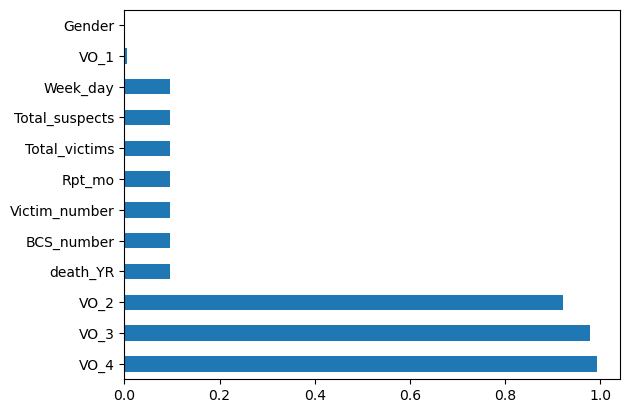

In [23]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

# Initial - Filling in missing values

Recoded variables per Data documentation:
    na values = 'Value not reported'

In [24]:
df.fillna('Value not reported', inplace=True)

In [25]:
#no duplicates detected
df.loc[df.duplicated(keep=False)]

,County_Codes,NCIC_Agency_Codes,BCS_number,Victim_number,Rpt_mo,Rpt_YR,Total_victims,Total_suspects,Gender,Victim_Race,Victim_Age,Crime_status,VO_1,VO_2,VO_3,VO_4,Incident_Month,Inc_day,Inc_YR,Week_day,death_YR,Weap,Location,Precipitating_event,Spec_Circ_1


Recoding the gender variable as:

In [26]:
df['Gender'].replace(0, 'Unknown', inplace=True)
df['Gender'].replace(1, 'Male', inplace=True)
df['Gender'].replace(2, 'Female', inplace=True)



In [27]:
df['Gender'].unique()

array(['Female', 'Male', 'Value not reported', 'Unknown'], dtype=object)

In [28]:
df['Gender'] = df['Gender'].astype(str)


In [29]:
df.columns

Index(['County_Codes', 'NCIC_Agency_Codes', 'BCS_number', 'Victim_number',
       'Rpt_mo', 'Rpt_YR', 'Total_victims', 'Total_suspects', 'Gender',
       'Victim_Race', 'Victim_Age', 'Crime_status', 'VO_1', 'VO_2', 'VO_3',
       'VO_4', 'Incident_Month', 'Inc_day', 'Inc_YR', 'Week_day', 'death_YR',
       'Weap', 'Location', 'Precipitating_event', 'Spec_Circ_1'],
      dtype='object')

In [30]:
features = ['County_Codes', 'NCIC_Agency_Codes', 'BCS_number', 'Victim_number',
       'Rpt_mo', 'Rpt_YR', 'Total_victims', 'Total_suspects', 'Gender',
       'Victim_Race', 'Victim_Age', 'Crime_status', 'VO_1', 'VO_2', 'VO_3',
       'VO_4', 'Incident_Month', 'Inc_day', 'Inc_YR', 'Week_day', 'death_YR',
       'Weap', 'Location', 'Precipitating_event', 'Spec_Circ_1']

for feature in features:
    null_check = pd.isnull(df[feature])
    print(df[null_check])

Empty DataFrame
Columns: [County_Codes, NCIC_Agency_Codes, BCS_number, Victim_number, Rpt_mo, Rpt_YR, Total_victims, Total_suspects, Gender, Victim_Race, Victim_Age, Crime_status, VO_1, VO_2, VO_3, VO_4, Incident_Month, Inc_day, Inc_YR, Week_day, death_YR, Weap, Location, Precipitating_event, Spec_Circ_1]
Index: []
Empty DataFrame
Columns: [County_Codes, NCIC_Agency_Codes, BCS_number, Victim_number, Rpt_mo, Rpt_YR, Total_victims, Total_suspects, Gender, Victim_Race, Victim_Age, Crime_status, VO_1, VO_2, VO_3, VO_4, Incident_Month, Inc_day, Inc_YR, Week_day, death_YR, Weap, Location, Precipitating_event, Spec_Circ_1]
Index: []
Empty DataFrame
Columns: [County_Codes, NCIC_Agency_Codes, BCS_number, Victim_number, Rpt_mo, Rpt_YR, Total_victims, Total_suspects, Gender, Victim_Race, Victim_Age, Crime_status, VO_1, VO_2, VO_3, VO_4, Incident_Month, Inc_day, Inc_YR, Week_day, death_YR, Weap, Location, Precipitating_event, Spec_Circ_1]
Index: []
Empty DataFrame
Columns: [County_Codes, NCIC_Agen

## Recoding the Age variable

In [31]:
df['Victim_Age'].unique()

array(['19', '38', '34', '22', '26', '43', '23', '61', '30', '17', '49',
       '41', '48', '36', '58', '44', '27', '25', '73', '62', '28', '24',
       '29', '52', '57', '18', '51', '21', '40', '31', '35', '47', '46',
       '50', '45', '37', '39', '59', '56', '68', '60', '32', '86', '55',
       '54', '53', '20', '42', '69', '70', '81', '33', '1', '4', '63',
       '16', '2', '0', '84', '66', '65', '15', 'NB', '12', '72', '3', '5',
       'BB', '75', '78', '14', '13', '11', '93', '89', '90', '71', '83',
       '79', '64', '67', '76', '95', '94', '10', '91', '92', '85', '82',
       '77', '6', '80', '88', '8', '74', '87', '9', '7', '97', '99', '96'],
      dtype=object)

In [32]:

df['Victim_Age'].replace('BB', 'One week to 12 months', inplace=True)
df['Victim_Age'].replace('NB', 'Birth to one week', inplace=True)
df['Victim_Age'].replace('99', '99 or over', inplace=True)
df['Victim_Age'].replace('0', 'Unknown', inplace=True)

In [33]:
df["Victim_Age"].unique()

array(['19', '38', '34', '22', '26', '43', '23', '61', '30', '17', '49',
       '41', '48', '36', '58', '44', '27', '25', '73', '62', '28', '24',
       '29', '52', '57', '18', '51', '21', '40', '31', '35', '47', '46',
       '50', '45', '37', '39', '59', '56', '68', '60', '32', '86', '55',
       '54', '53', '20', '42', '69', '70', '81', '33', '1', '4', '63',
       '16', '2', 'Unknown', '84', '66', '65', '15', 'Birth to one week',
       '12', '72', '3', '5', 'One week to 12 months', '75', '78', '14',
       '13', '11', '93', '89', '90', '71', '83', '79', '64', '67', '76',
       '95', '94', '10', '91', '92', '85', '82', '77', '6', '80', '88',
       '8', '74', '87', '9', '7', '97', '99 or over', '96'], dtype=object)

# Cleaning Race variable

In [34]:
df['Victim_Race'].unique()

array(['H', 'X', 'W', 'B', 'A', 'O', 'U', 'I', 'C', 'S', 'D', 'P', 'F',
       'V', 'Z', 'K', 'J', 'L', 'G'], dtype=object)

In [35]:
df['Victim_Race'].replace(['H', 'X', 'W', 'B', 'A', 'O', 'U', 'I', 'C', 'S', 'D', 'P', 'F', 'V', 'Z', 'K', 'J', 'L', 'G'], 
                   ['Hispanic', 'Unkown', 'White', 'Black', 'Other Asian', 'Other', 'Hawaiian', 'American Indian', 'Chinese','Samoan',
                   'Cambodian', 'Pacific Islander', 'Filipino', 'Vietnamese', 'Asian Indian', 'Korean','Japanese','Laotian', 'Guamanian'],
                   inplace=True)



In [36]:
df['Victim_Race'].unique()

array(['Hispanic', 'Unkown', 'White', 'Black', 'Other Asian', 'Other',
       'Hawaiian', 'American Indian', 'Chinese', 'Samoan', 'Cambodian',
       'Pacific Islander', 'Filipino', 'Vietnamese', 'Asian Indian',
       'Korean', 'Japanese', 'Laotian', 'Guamanian'], dtype=object)

# Crime Status
## only includes Actual/willful homicide

In [37]:
df['Crime_status'].unique()

array([1])

In [38]:
df['Crime_status'].replace(1,'Actual/Willful Homicide' , inplace=True)

# Recoding Victim Offender Relationship with full text description per data documentation

In [39]:
VO_1 = [30.0, 50.0, 21.0, 40.0, 2.0, 23.0, 45.0, 20.0, 1.0, 28.0, 5.0,
       16.0, 9.0, 4.0, 6.0, 27.0, 26.0, 11.0, 8.0, 7.0, 10.0, 22.0, 12.0,
       25.0, 29.0, 14.0, 15.0, 24.0, 13.0, 3.0]

VO_1.sort(key = float)
VO_1

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 40.0,
 45.0,
 50.0]

In [40]:
VO_2 = ['Husband',
        'Wife',
        'Common-law husband',
        'Common-law wife',
        'Mother',
        'Father',
        'Son',
        'Daughter',
        'Brother',
        'Sister',
        'In-law',
        'Stepfather',
        'Stepmother',
        'Stepson',
        'Stepdaughter',
        'Other family',
        'Neighbor',
        'Acquaintance',
       ' Boyfriend/Ex-Boyfriend',
       ' Girlfriend/Ex-Girlfriend',
        'Ex-husband',
        'Ex-wife',
        'Employer',
        'Employee',
        'Friend',
        'Homosexual relationship',
        'Other known to Victim',
        'Stranger',
        'Gang member (Beginning,1992)',
        'Unable to determine relationship']





In [41]:
df['Victim_Offender_Relationship_1'] = df['VO_1']


In [42]:
df['Victim_Offender_Relationship_1'].replace(VO_1,
                   VO_2,
                   inplace=True)


In [43]:
df['Victim_Offender_Relationship_1'].unique()

array(['Other known to Victim', 'Unable to determine relationship',
       'Acquaintance', 'Stranger', 'Wife', ' Girlfriend/Ex-Girlfriend',
       'Gang member (Beginning,1992)', 'Neighbor', 'Husband', 'Friend',
       'Mother', 'Other family', 'Brother', 'Common-law wife', 'Father',
       'Employee', 'Employer', 'In-law', 'Daughter', 'Son', 'Sister',
       ' Boyfriend/Ex-Boyfriend', 'Stepfather', 'Ex-wife',
       'Homosexual relationship', 'Stepson', 'Stepdaughter', 'Ex-husband',
       'Stepmother', 'Common-law husband', 'Value not reported'],
      dtype=object)

# Recoding Week Day variable from code to full text

In [44]:
df['Week_day'].unique()

array([2.0, 1.0, 5.0, 3.0, 4.0, 7.0, 6.0, 'Value not reported'],
      dtype=object)

In [45]:
df['Week_day'].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], 
                       ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'], 
                        inplace=True)

In [46]:
df['Week_day'].unique()

array(['Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Saturday',
       'Friday', 'Value not reported'], dtype=object)

#  Incident Month
will keep as is for now

In [47]:
df['Incident_Month'].unique()

array([ 2,  3,  6,  8,  9, 10, 12,  4,  5,  1,  7, 11])

# Recoding Precipitaing event 

In [48]:
df['Precipitating_event'].unique()

array([99,  3, 26, 62, 63, 46, 45, 18, 47,  7, 70, 43, 44, 48, 42, 60, 61,
       40,  5,  2,  9, 19, 10, 41,  6, 17])

In [49]:
df['Precipitating_event'].dtype

dtype('int64')

In [50]:
Perc_event_codes = [99,  3, 26, 62, 63, 46, 45, 18, 47,  7, 70, 43, 44, 48, 42, 60, 61, 40,  5,  2,  9, 19, 10, 41,  6, 17]
Perc_event_codes



[99,
 3,
 26,
 62,
 63,
 46,
 45,
 18,
 47,
 7,
 70,
 43,
 44,
 48,
 42,
 60,
 61,
 40,
 5,
 2,
 9,
 19,
 10,
 41,
 6,
 17]

In [51]:
Perc_event_codes.sort(key = int)
Perc_event_codes

[2,
 3,
 5,
 6,
 7,
 9,
 10,
 17,
 18,
 19,
 26,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 60,
 61,
 62,
 63,
 70,
 99]

In [52]:
Perc_events = ['Rape',
        'Robbery',
        'Burglary',
        'Larceny',
        'Motor vehicle theft',
        'Arson',
        'Prostitution and commercial vice (i.e., prostitute killed by pimp during argument over money)',
        'Other sex offense (sodomy, etc.)',
        'Narcotic drug laws (not overdose)',
        'Gambling',
        'Other not specified (kidnapping, murder for hire)',
        'Lover''s triangle',
        'Child killed by babysitter',
        'Brawl due to influence of alcohol (i.e., argument while intoxicated)',
        'Brawl due to influence of narcotics (i.e., argument while under the influence)',
        'Argument over money or property (revenge over money or property)',
        'Other arguments (revenge)',
        'Execution killing(s)',
        'Gang killing(s) (street gangs, motorcycle gangs)',
        'Institutional killing(s) (jail, prison, state hospital)',
        'Other - non-felony (mercy killing, suicide pacts, mentally deranged offender)',
        'Child abuse',
        'Domestic Violence (1992) (Revised June 2023)',
        'Drive-by Shooting (unspecified) (1996)',
        'All - suspected felony type',
        'All instances where facts provided do not permit determination of circumstances (skeletal remains)',
        ]

In [53]:
df['Precipitating_event'].replace(Perc_event_codes,
                   Perc_events,
                   inplace=True)

In [54]:
df['Precipitating_event'].unique()

array(['All instances where facts provided do not permit determination of circumstances (skeletal remains)',
       'Robbery', 'Other not specified (kidnapping, murder for hire)',
       'Domestic Violence (1992) (Revised June 2023)',
       'Drive-by Shooting (unspecified) (1996)', 'Execution killing(s)',
       'Other arguments (revenge)', 'Narcotic drug laws (not overdose)',
       'Gang killing(s) (street gangs, motorcycle gangs)',
       'Motor vehicle theft', 'All - suspected felony type',
       'Brawl due to influence of narcotics (i.e., argument while under the influence)',
       'Argument over money or property (revenge over money or property)',
       'Institutional killing(s) (jail, prison, state hospital)',
       'Brawl due to influence of alcohol (i.e., argument while intoxicated)',
       'Other - non-felony (mercy killing, suicide pacts, mentally deranged offender)',
       'Child abuse', 'Lovers triangle', 'Burglary', 'Rape', 'Arson',
       'Gambling',
       'Prost

# Creating incident date variable as datetime dtype

In [55]:
df['date'] = pd.to_datetime(dict(year=df.Inc_YR, month=df.Incident_Month, day=df.Inc_day))


# Getting NCIC Codes for location mapping
## will only use county level analysis here

In [56]:
NCIC = pd.read_excel("NCIC Code Jurisdiction List_04242023.xlsx")
NCIC.head()

,CntyCode,County,Code,Agency,Start,End
0,1,Alameda County,0100,Alameda Co. Sheriff's Department,NaN,NaN
1,1,Alameda County,0101,Alameda,NaN,NaN
2,1,Alameda County,0102,Albany,NaN,NaN
3,1,Alameda County,0103,Berkeley,NaN,NaN
4,1,Alameda County,0104,Emeryville,NaN,NaN


In [57]:
NCIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CntyCode  921 non-null    int64 
 1   County    921 non-null    object
 2   Code      921 non-null    object
 3   Agency    921 non-null    object
 4   Start     340 non-null    object
 5   End       189 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.3+ KB


In [58]:
NCIC.sort_values(by='CntyCode', ascending = True, inplace = True)
NCIC.head()

,CntyCode,County,Code,Agency,Start,End
0,1,Alameda County,0100,Alameda Co. Sheriff's Department,NaN,NaN
28,1,Alameda County,0199,CA Highway Patrol - Alameda,NaN,NaN
27,1,Alameda County,0198,CA State Police - Alameda,NaN,6/30/1995
26,1,Alameda County,0197,UC Berkeley,NaN,NaN
25,1,Alameda County,141,Diablo Range DPR,2020-01-01 00:00:00,NaN


In [59]:
county_codes = NCIC[['CntyCode','County']]

In [60]:
county_codes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 852
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CntyCode  921 non-null    int64 
 1   County    921 non-null    object
dtypes: int64(1), object(1)
memory usage: 21.6+ KB


In [61]:
county_codes = county_codes.drop_duplicates()
county_codes = county_codes.reset_index(drop=True)
county_codes

,CntyCode,County
0,1,Alameda County
1,2,Alpine County
2,3,Amador County
3,4,Butte County
4,5,Calaveras County
5,6,Colusa County
6,7,Contra Costa County
7,8,Del Norte County
8,9,El Dorado County
9,10,Fresno County


In [62]:
# Rename our columns
county_codes = county_codes.rename(columns={'CntyCode' : 'County_Codes'})



# Merging county codes and county names

In [63]:

df = pd.merge(df, county_codes, how='outer', on='County_Codes')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10263 entries, 0 to 10262
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   County_Codes                    10263 non-null  int64         
 1   NCIC_Agency_Codes               10261 non-null  object        
 2   BCS_number                      10261 non-null  object        
 3   Victim_number                   10261 non-null  object        
 4   Rpt_mo                          10261 non-null  object        
 5   Rpt_YR                          10261 non-null  float64       
 6   Total_victims                   10261 non-null  object        
 7   Total_suspects                  10261 non-null  object        
 8   Gender                          10261 non-null  object        
 9   Victim_Race                     10261 non-null  object        
 10  Victim_Age                      10261 non-null  object        
 11  Cr

In [65]:
#filling in NaT values None
df.replace({pd.NaT: None}, inplace=True)


# Gathering needed variables

In [66]:
homicide_df = df[['Gender','Victim_Race', 'Victim_Age', 'Incident_Month', 'Inc_YR', 'Week_day',
       'Precipitating_event','Victim_Offender_Relationship_1', 'date', 'County']]

In [67]:
homicide_df = homicide_df[homicide_df['Inc_YR'].notnull()].reset_index(drop=True)

In [68]:
homicide_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          10261 non-null  object 
 1   Victim_Race                     10261 non-null  object 
 2   Victim_Age                      10261 non-null  object 
 3   Incident_Month                  10261 non-null  float64
 4   Inc_YR                          10261 non-null  float64
 5   Week_day                        10261 non-null  object 
 6   Precipitating_event             10261 non-null  object 
 7   Victim_Offender_Relationship_1  10261 non-null  object 
 8   date                            10261 non-null  object 
 9   County                          10261 non-null  object 
dtypes: float64(2), object(8)
memory usage: 801.8+ KB


# This is the final csv file we will use with all selected observations and columns

In [69]:
homicide_df

,Gender,Victim_Race,Victim_Age,Incident_Month,Inc_YR,Week_day,Precipitating_event,Victim_Offender_Relationship_1,date,County
0,Female,Hispanic,19,2.0,2018.0,Monday,All instances where facts provided do not perm...,Other known to Victim,2018-02-12 00:00:00,Alameda County
1,Male,Unkown,38,3.0,2018.0,Sunday,All instances where facts provided do not perm...,Unable to determine relationship,2018-03-18 00:00:00,Alameda County
2,Male,Hispanic,34,6.0,2018.0,Thursday,All instances where facts provided do not perm...,Other known to Victim,2018-06-07 00:00:00,Alameda County
3,Male,White,22,8.0,2018.0,Thursday,All instances where facts provided do not perm...,Unable to determine relationship,2018-08-09 00:00:00,Alameda County
4,Male,Hispanic,26,9.0,2018.0,Sunday,All instances where facts provided do not perm...,Unable to determine relationship,2018-09-09 00:00:00,Alameda County
...,...,...,...,...,...,...,...,...,...,...
10256,Female,White,22,4.0,2021.0,Value not reported,"Other not specified (kidnapping, murder for hire)",Unable to determine relationship,2021-04-23 00:00:00,Mariposa County
10257,Female,White,46,3.0,2022.0,Value not reported,All instances where facts provided do not perm...,Unable to determine relationship,2022-03-25 00:00:00,Mariposa County
10258,Male,White,44,9.0,2022.0,Value not reported,"Other not specified (kidnapping, murder for hire)",Acquaintance,2022-09-16 00:00:00,Lassen County
10259,Male,White,38,2.0,2022.0,Value not reported,Narcotic drug laws (not overdose),Acquaintance,2022-02-23 00:00:00,Lassen County


In [70]:
homicide_df.to_csv('homicide.csv')